# Denoising MNIST Digit Dataset
#### Using a Convolutional Autoencoder


(60000, 28, 28)
(60000,)


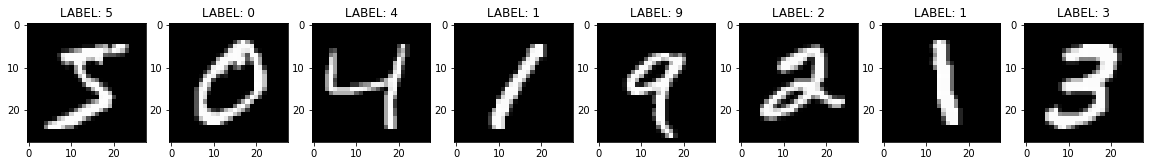

In [ ]:
 import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

def plot(x,label):
  imgs = x[:8]
  fig = plt.figure(figsize=[20,5])

  for num, pic in enumerate(imgs):
    plot = fig.add_subplot(1,8,num+1)
    plot.title.set_text("LABEL: " + label[num].astype(str))
    pic = pic.reshape(28,28)
    plot.imshow(pic, cmap='gray')

  plt.show()
  return

plot(x_train, y_train)

# Add Noise to the Dataset

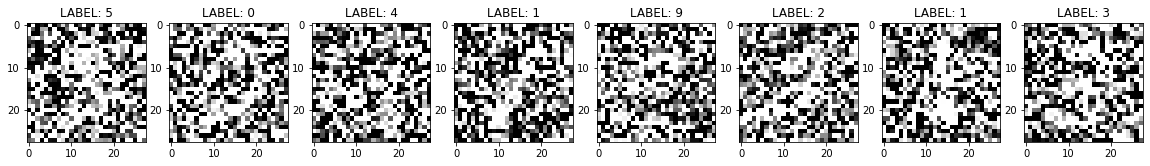

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

nf = 0.5 # Noise Factor
x_train_noisy = x_train + nf + np.random.normal(loc=0.0, scale=1.0, size = x_train.shape)
x_test_noisy = x_test + nf + np.random.normal(loc=0.0, scale=1.0, size = x_test.shape)

x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

plot(x_train_noisy, y_train)

# Create Conv AE Models with appropriate activation functions

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 32)          0  

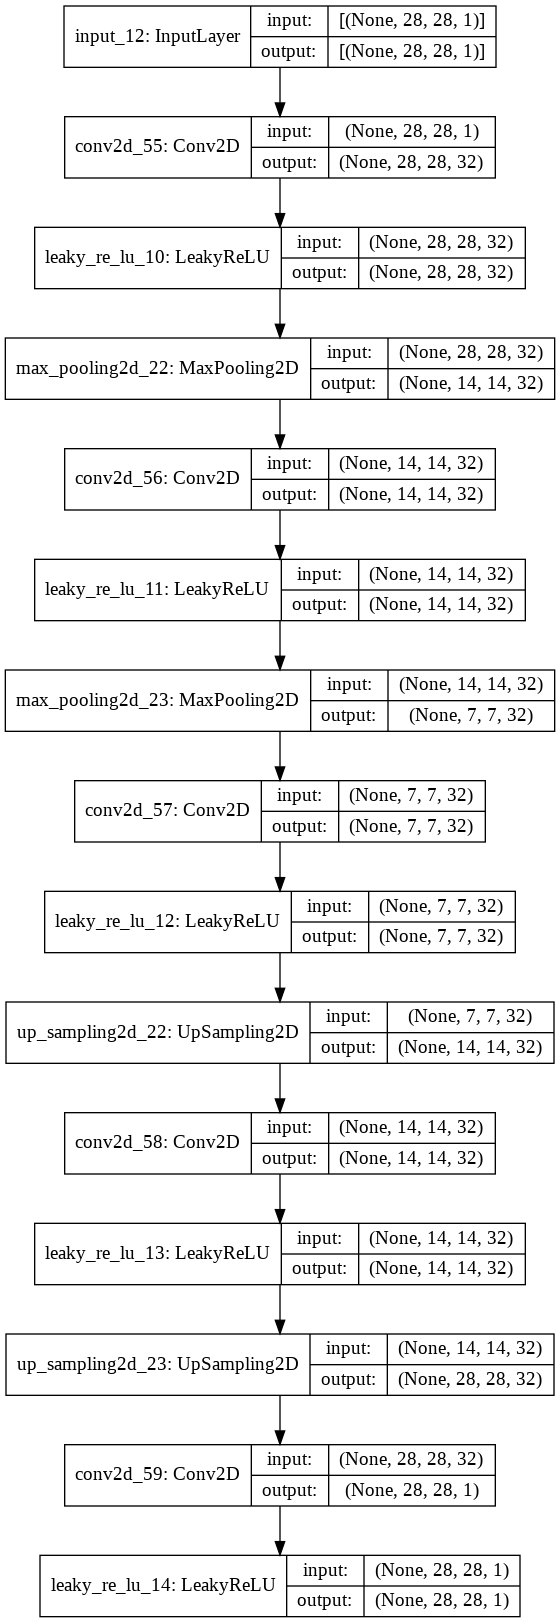

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, LeakyReLU
from keras.models import Model
from keras.utils import plot_model

def make_model(act = 'relu'):
  input = Input(shape=(28,28,1))

  if act is 'leakyrelu':
    encode1 = Conv2D(32, (3,3), padding='same')(input)
    encode1 = LeakyReLU()(encode1)
    encode2 = MaxPooling2D((2,2), padding='same')(encode1)
    encode3 = Conv2D(32, (3,3), padding='same')(encode2)
    encode3 = LeakyReLU()(encode3)
    encode4 = MaxPooling2D((2,2), padding='same')(encode3)

    decode1 = Conv2D(32, (3,3), padding='same')(encode4)
    decode1 = LeakyReLU()(decode1)
    decode2 = UpSampling2D((2,2))(decode1)
    decode3 = Conv2D(32, (3,3), padding='same')(decode2)
    decode3 = LeakyReLU()(decode3)
    decode4 = UpSampling2D((2,2))(decode3)
    decode5 = Conv2D(1, (3,3), padding='same')(decode4)
    decode5 = LeakyReLU()(decode5)

  else:
    encode1 = Conv2D(32, (3,3), activation=act, padding='same')(input)
    encode2 = MaxPooling2D((2,2), padding='same')(encode1)
    encode3 = Conv2D(32, (3,3),activation=act, padding='same')(encode2)
    encode4 = MaxPooling2D((2,2), padding='same')(encode3)

    decode1 = Conv2D(32, (3,3),activation=act, padding='same')(encode4)
    decode2 = UpSampling2D((2,2))(decode1)
    decode3 = Conv2D(32, (3,3),activation=act, padding='same')(decode2)
    decode4 = UpSampling2D((2,2))(decode3)
    decode5 = Conv2D(1, (3,3),activation=act, padding='same')(decode4)

  model = Model(input,decode5)
  return model

model_adam_relu = make_model()
model_bgd_relu = make_model()
model_rms_relu = make_model()

model_adam_sig = make_model(act='sigmoid')
model_bgd_sig = make_model(act='sigmoid')
model_rms_sig = make_model(act='sigmoid')

model_adam_tanh = make_model(act='tanh')
model_bgd_tanh = make_model(act='tanh')
model_rms_tanh = make_model(act='tanh')

model_adam_leakyrelu = make_model(act='leakyrelu')
model_bgd_leakyrelu = make_model(act='leakyrelu')
model_rms_leakyrelu = make_model(act='leakyrelu')

model_rms_leakyrelu.summary()

plot_model(model_rms_leakyrelu,show_shapes=True)

# Compile & train models with appropriate optimizer

In [ ]:
print("------------- Training Adam w/ Relu ---------------")
model_adam_relu.compile(optimizer='Adam', loss='mean_squared_error',metrics=['acc'])
history_adam_relu = model_adam_relu.fit(x_train_noisy, x_train, batch_size=128, epochs=50)

print("------------- Training Batch Gradient Descent w/ Relu ---------------")
model_bgd_relu.compile(optimizer='SGD', loss='mean_squared_error',metrics=['acc'])
history_bgd_relu = model_bgd_relu.fit(x_train_noisy, x_train, batch_size=128, epochs=50)

print("------------- Training RMSprop w/ Relu ---------------")
model_rms_relu.compile(optimizer='RMSprop', loss='mean_squared_error',metrics=['acc'])
history_rms_relu = model_rms_relu.fit(x_train_noisy, x_train, batch_size=128, epochs=50)



print("------------- Training Adam w/ Sigmoid ---------------")
model_adam_sig.compile(optimizer='Adam', loss='mean_squared_error',metrics=['acc'])
history_adam_sig = model_adam_sig.fit(x_train_noisy, x_train, batch_size=128, epochs=50)

print("------------- Training Batch Gradient Descent w/ Sigmoid ---------------")
model_bgd_sig.compile(optimizer='SGD', loss='mean_squared_error',metrics=['acc'])
history_bgd_sig = model_bgd_sig.fit(x_train_noisy, x_train, batch_size=128, epochs=50)

print("------------- Training RMSprop w/ Sigmoid ---------------")
model_rms_sig.compile(optimizer='RMSprop', loss='mean_squared_error',metrics=['acc'])
history_rms_sig = model_rms_sig.fit(x_train_noisy, x_train, batch_size=128, epochs=50)



print("------------- Training Adam w/ Tanh ---------------")
model_adam_tanh.compile(optimizer='Adam', loss='mean_squared_error',metrics=['acc'])
history_adam_tanh = model_adam_tanh.fit(x_train_noisy, x_train, batch_size=128, epochs=50)

print("------------- Training Batch Gradient Descent w/ Tanh ---------------")
model_bgd_tanh.compile(optimizer='SGD', loss='mean_squared_error',metrics=['acc'])
history_bgd_tanh = model_bgd_tanh.fit(x_train_noisy, x_train, batch_size=128, epochs=50)

print("------------- Training RMSprop w/ Tanh ---------------")
model_rms_tanh.compile(optimizer='RMSprop', loss='mean_squared_error',metrics=['acc'])
history_rms_tanh = model_rms_tanh.fit(x_train_noisy, x_train, batch_size=128, epochs=50)



print("------------- Training Adam w/ LeakyRelu ---------------")
model_adam_leakyrelu.compile(optimizer='Adam', loss='mean_squared_error',metrics=['acc'])
history_adam_leakyrelu = model_adam_leakyrelu.fit(x_train_noisy, x_train, batch_size=128, epochs=50)

print("------------- Training Batch Gradient Descent w/ LeakyRelu ---------------")
model_bgd_leakyrelu.compile(optimizer='SGD', loss='mean_squared_error',metrics=['acc'])
history_bgd_leakyrelu = model_bgd_leakyrelu.fit(x_train_noisy, x_train, batch_size=128, epochs=50)

print("------------- Training RMSprop w/ LeakyRelu ---------------")
model_rms_leakyrelu.compile(optimizer='RMSprop', loss='mean_squared_error',metrics=['acc'])
history_rms_leakyrelu = model_rms_leakyrelu.fit(x_train_noisy, x_train, batch_size=128, epochs=50)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
model_adam_relu.save("/content/gdrive/MyDrive/EE608 Final Project/Digit_models/adam_relu")
model_bgd_relu.save("/content/gdrive/MyDrive/EE608 Final Project/Digit_models/bgd_relu")
model_rms_relu.save("/content/gdrive/MyDrive/EE608 Final Project/Digit_models/rms_relu")

model_adam_sig.save("/content/gdrive/MyDrive/EE608 Final Project/Digit_models/adam_sig")
model_bgd_sig.save("/content/gdrive/MyDrive/EE608 Final Project/Digit_models/bgd_sig")
model_rms_sig.save("/content/gdrive/MyDrive/EE608 Final Project/Digit_models/rms_sig")

model_adam_tanh.save("/content/gdrive/MyDrive/EE608 Final Project/Digit_models/adam_tanh")
model_bgd_tanh.save("/content/gdrive/MyDrive/EE608 Final Project/Digit_models/bgd_tanh")
model_rms_tanh.save("/content/gdrive/MyDrive/EE608 Final Project/Digit_models/rms_tanh")

model_adam_leakyrelu.save("/content/gdrive/MyDrive/EE608 Final Project/Digit_models/adam_leakyrelu")
model_bgd_leakyrelu.save("/content/gdrive/MyDrive/EE608 Final Project/Digit_models/bgd_leakyrelu")
model_rms_leakyrelu.save("/content/gdrive/MyDrive/EE608 Final Project/Digit_models/rms_leakyrelu")


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/EE608 Final Project/Digit_models/adam_relu/assets
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/EE608 Final Project/Digit_models/bgd_relu/assets
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/EE608 Final Project/Digit_models/rms_relu/assets
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/EE608 Final Project/Digit_models/adam_sig/assets
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/EE608 Final Project/Digit_models/bgd_sig/assets
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/EE608 Final Project/Digit_models/rms_sig/assets
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/EE608 Final Project/Digit_models/adam_tanh/assets
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/EE608 Final Project/Digit_models/bgd_tanh/assets
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/EE608 Final Project/Digit_models/rms_tanh/assets
INFO:tensorflow:Assets writt

# View Results

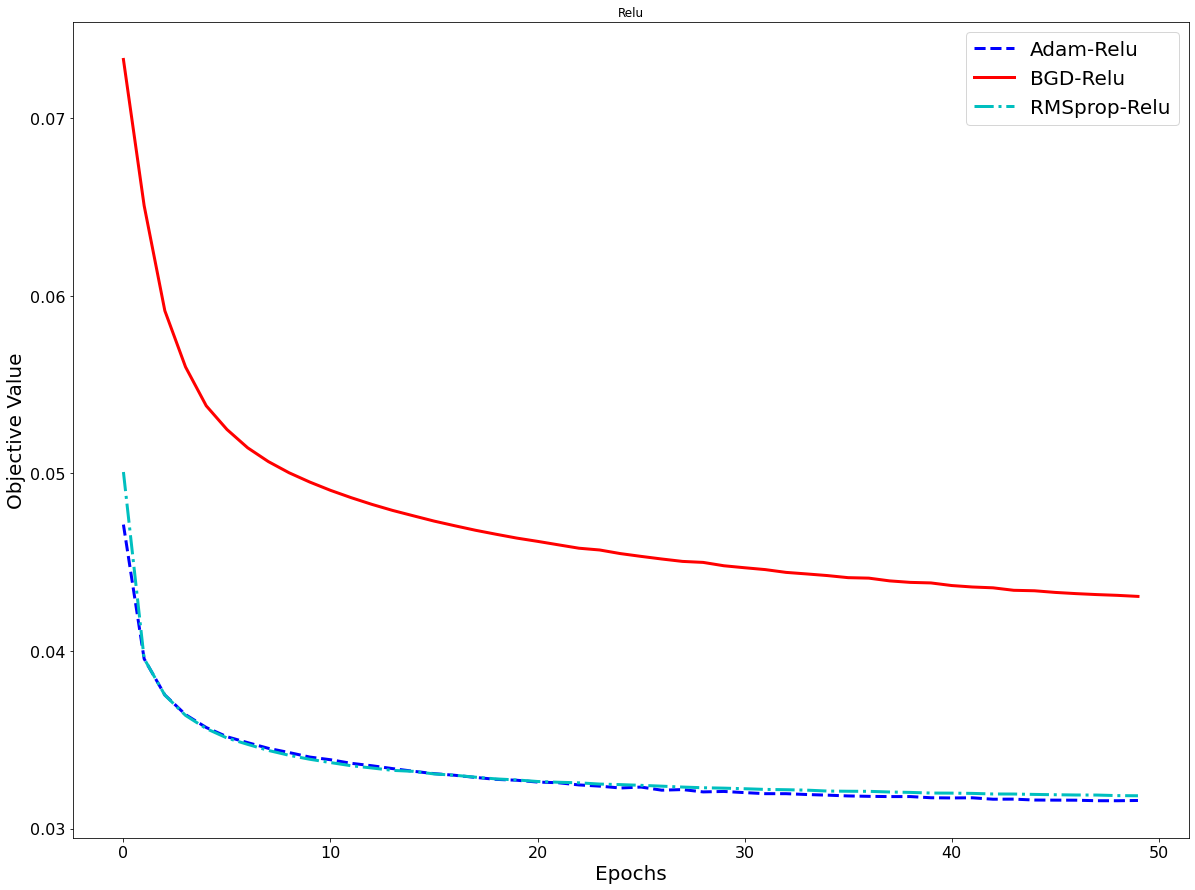

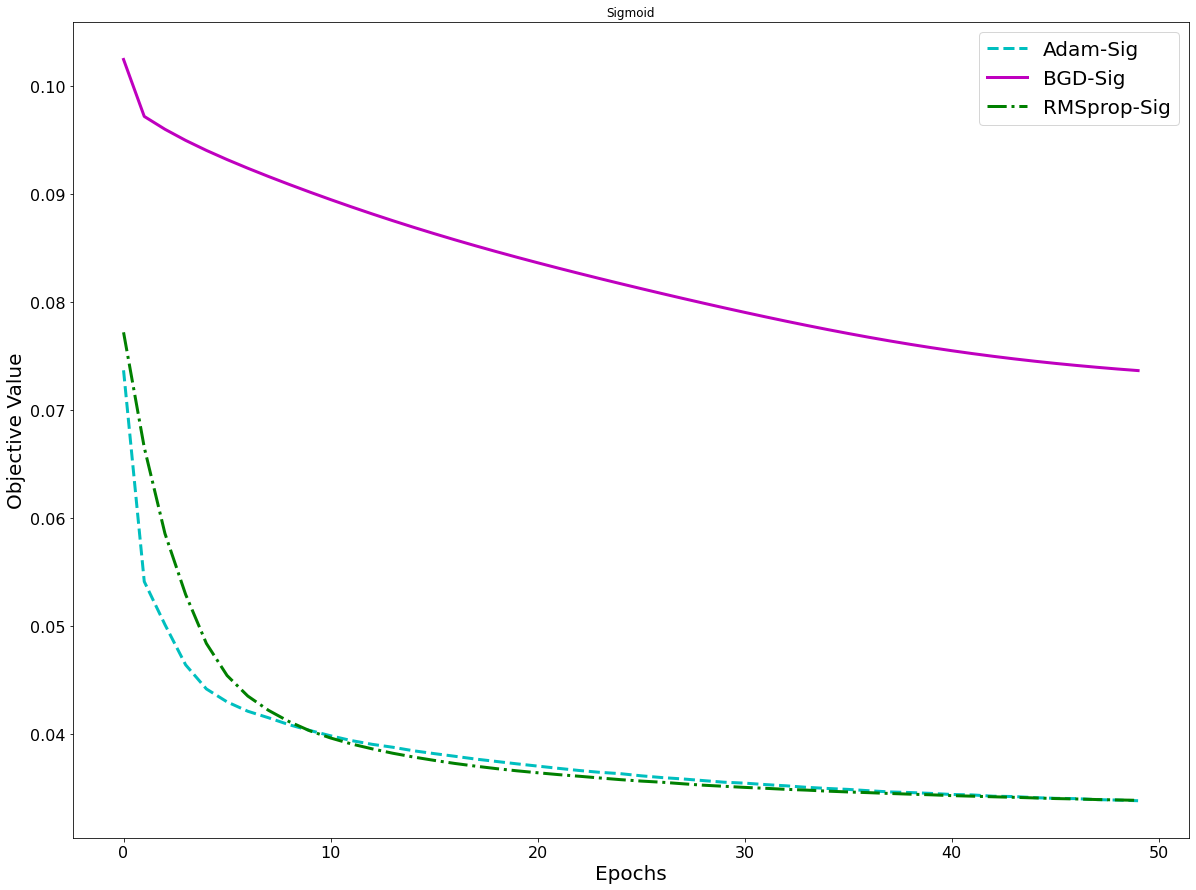

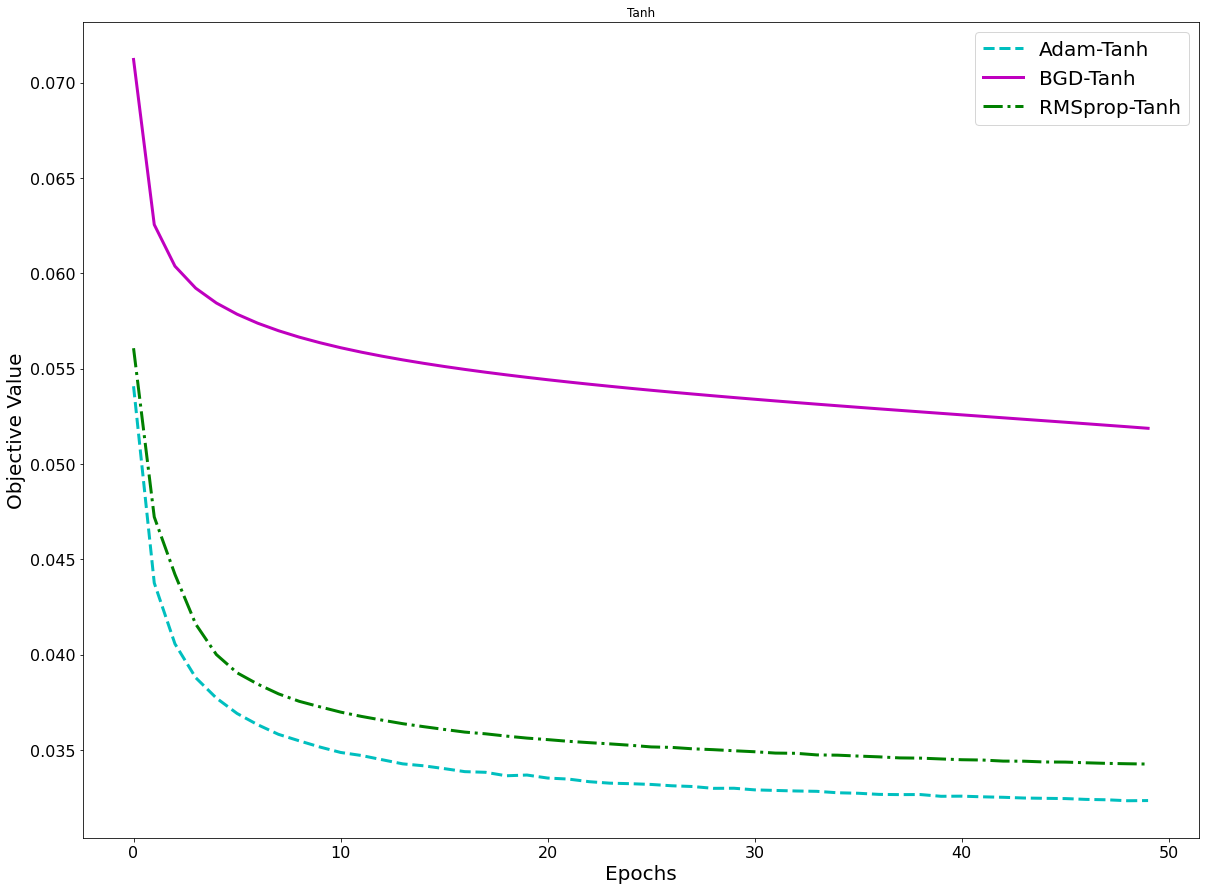

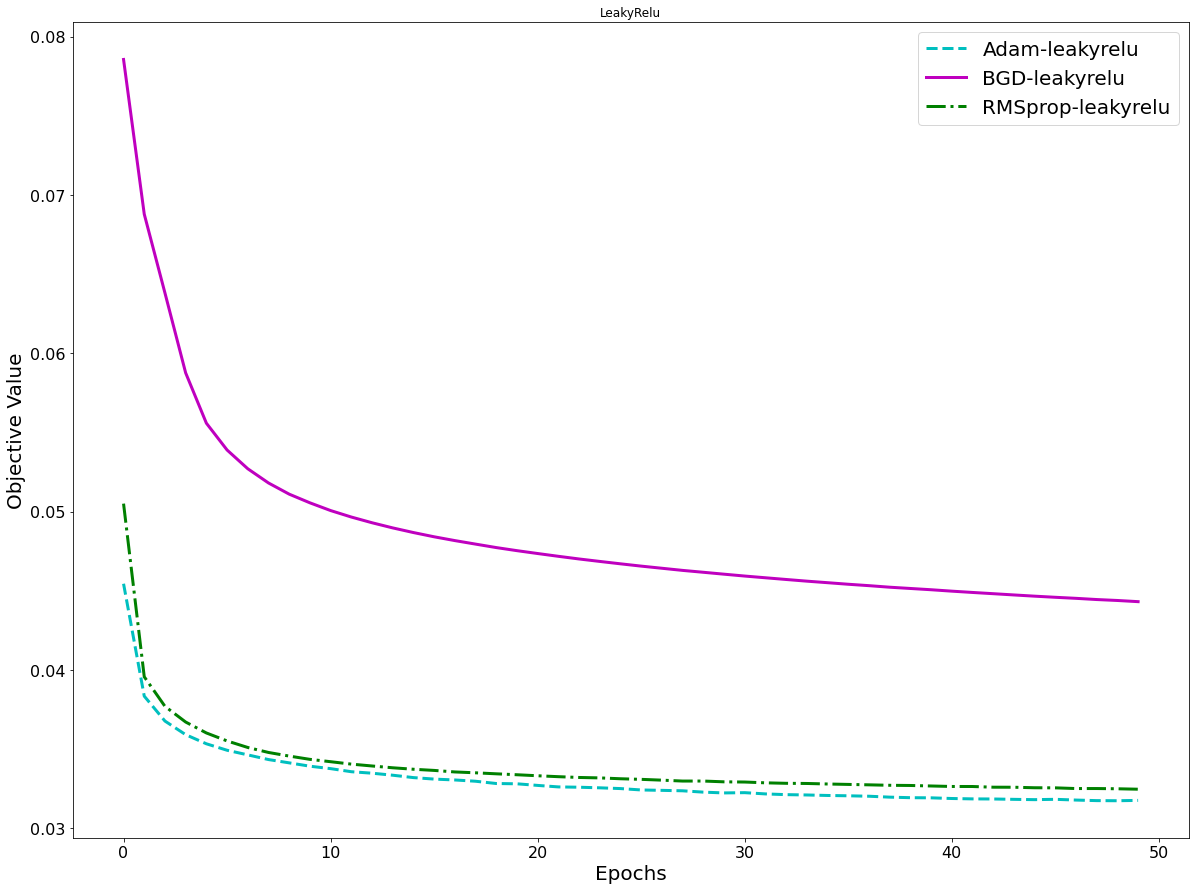

In [ ]:
fig = plt.figure(figsize=(20, 15))

epoch_range = np.arange(50)

line0, = plt.plot(epoch_range, history_adam_relu.history['loss'], '--b', linewidth=3)
line1, = plt.plot(epoch_range, history_bgd_relu.history['loss'], '-r', linewidth=3)
line2, = plt.plot(epoch_range, history_rms_relu.history['loss'], '-.c', linewidth=3)

plt.title("Relu")
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Objective Value', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend([line0, line1, line2], ['Adam-Relu', 'BGD-Relu', 'RMSprop-Relu' ], fontsize=20)
plt.show()

fig = plt.figure(figsize=(20, 15))

line0, = plt.plot(epoch_range, history_adam_sig.history['loss'], '--c', linewidth=3)
line1, = plt.plot(epoch_range, history_bgd_sig.history['loss'], '-m', linewidth=3)
line2, = plt.plot(epoch_range, history_rms_sig.history['loss'], '-.g', linewidth=3)

plt.title("Sigmoid")
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Objective Value', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend([line0, line1, line2], ['Adam-Sig', 'BGD-Sig', 'RMSprop-Sig' ], fontsize=20)
plt.show()



fig = plt.figure(figsize=(20, 15))

line0, = plt.plot(epoch_range, history_adam_tanh.history['loss'], '--c', linewidth=3)
line1, = plt.plot(epoch_range, history_bgd_tanh.history['loss'], '-m', linewidth=3)
line2, = plt.plot(epoch_range, history_rms_tanh.history['loss'], '-.g', linewidth=3)

plt.title("Tanh")
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Objective Value', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend([line0, line1, line2], ['Adam-Tanh', 'BGD-Tanh', 'RMSprop-Tanh' ], fontsize=20)
plt.show()



fig = plt.figure(figsize=(20, 15))

line0, = plt.plot(epoch_range, history_adam_leakyrelu.history['loss'], '--c', linewidth=3)
line1, = plt.plot(epoch_range, history_bgd_leakyrelu.history['loss'], '-m', linewidth=3)
line2, = plt.plot(epoch_range, history_rms_leakyrelu.history['loss'], '-.g', linewidth=3)

plt.title("LeakyRelu")
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Objective Value', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend([line0, line1, line2], ['Adam-leakyrelu', 'BGD-leakyrelu', 'RMSprop-leakyrelu' ], fontsize=20)
plt.show()

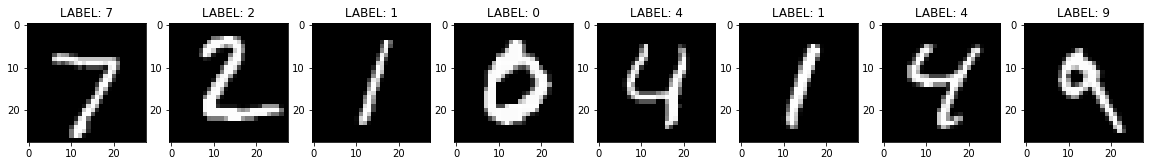

In [ ]:
plot(x_test, y_test)

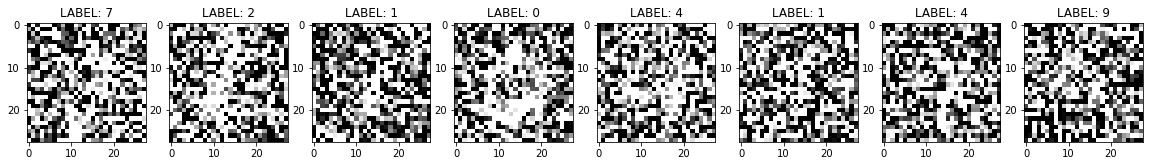

In [ ]:
plot(x_test_noisy,y_test)

Adam-Relu


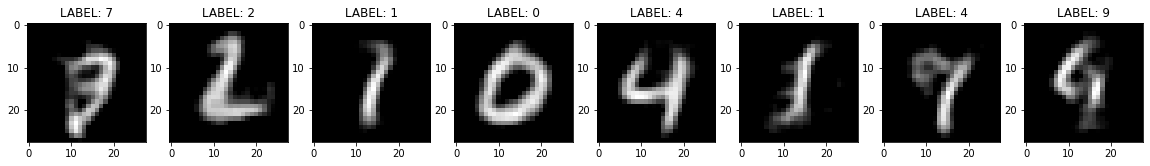

RMS-Relu


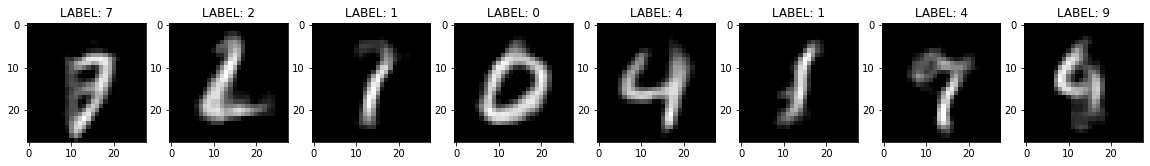

BGD-Relu


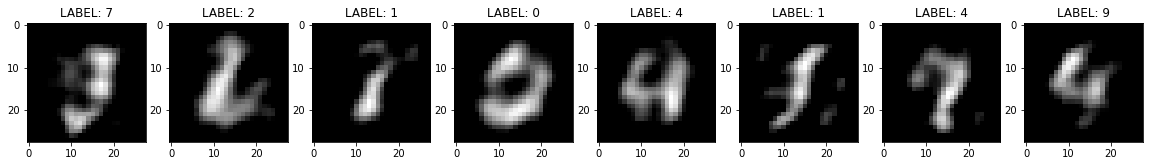

In [ ]:
p_adam_relu = model_adam_relu.predict(x_test_noisy)
p_rms_relu = model_rms_relu.predict(x_test_noisy)
p_bgd_relu = model_bgd_relu.predict(x_test_noisy)

print("Adam-Relu")
plot(p_adam_relu,y_test)
print("RMS-Relu")
plot(p_rms_relu,y_test)
print("BGD-Relu")
plot(p_bgd_relu,y_test)

Adam-Sig


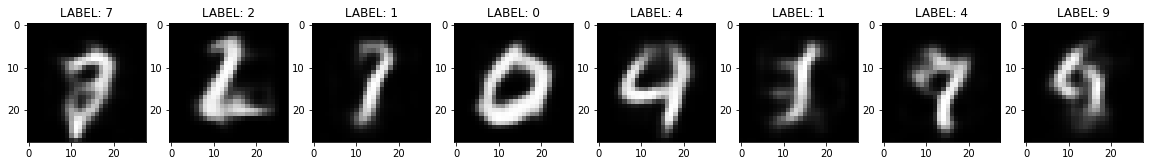

RMS-Sig


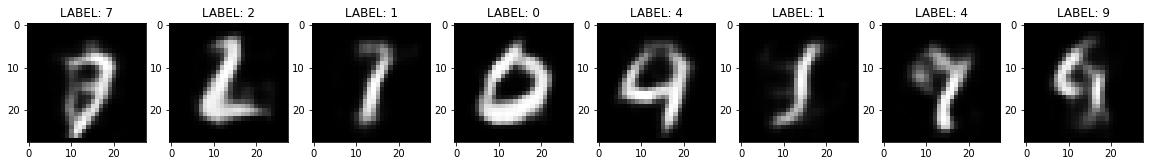

BGD-Sig


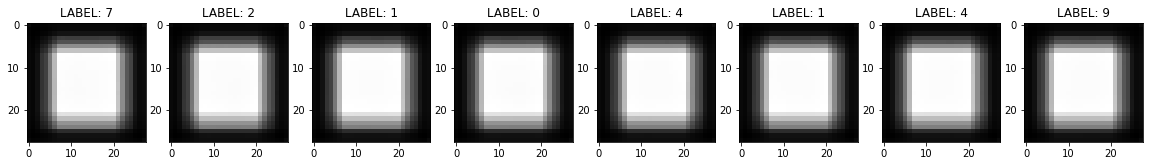

In [ ]:
p_adam_sig = model_adam_sig.predict(x_test_noisy)
p_rms_sig = model_rms_sig.predict(x_test_noisy)
p_bgd_sig = model_bgd_sig.predict(x_test_noisy)

print("Adam-Sig")
plot(p_adam_sig,y_test)
print("RMS-Sig")
plot(p_rms_sig,y_test)
print("BGD-Sig")
plot(p_bgd_sig,y_test)

Adam-Tanh


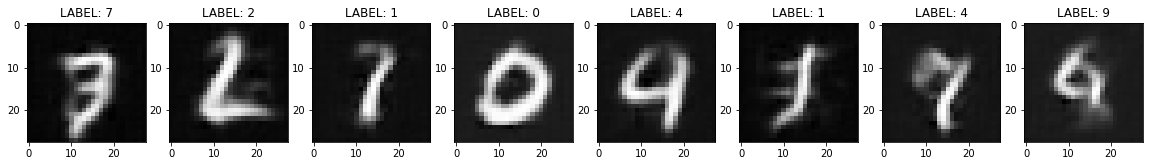

RMS-Tanh


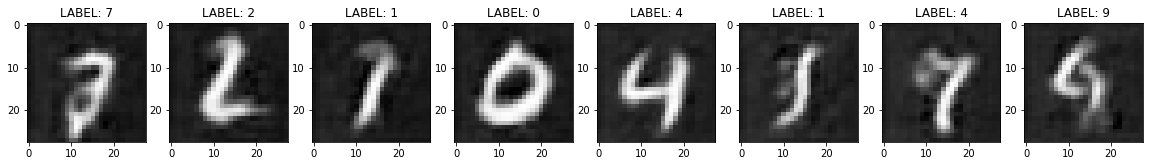

BGD-Tanh


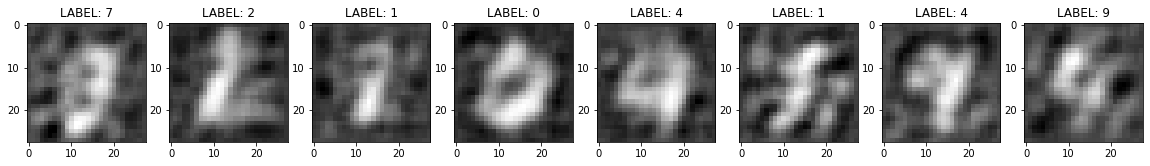

In [ ]:
p_adam_tanh = model_adam_tanh.predict(x_test_noisy)
p_rms_tanh = model_rms_tanh.predict(x_test_noisy)
p_bgd_tanh = model_bgd_tanh.predict(x_test_noisy)

print("Adam-Tanh")
plot(p_adam_tanh,y_test)
print("RMS-Tanh")
plot(p_rms_tanh,y_test)
print("BGD-Tanh")
plot(p_bgd_tanh,y_test)

Adam-leakyrelu


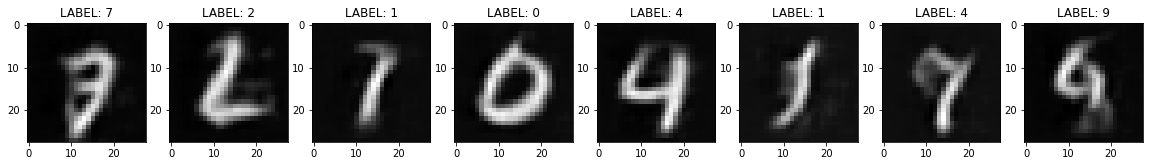

RMS-leakyrelu


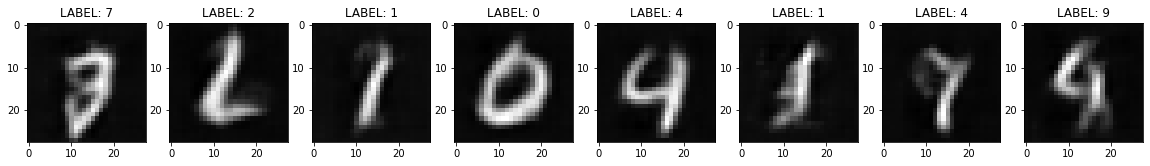

BGD-leakyrelu


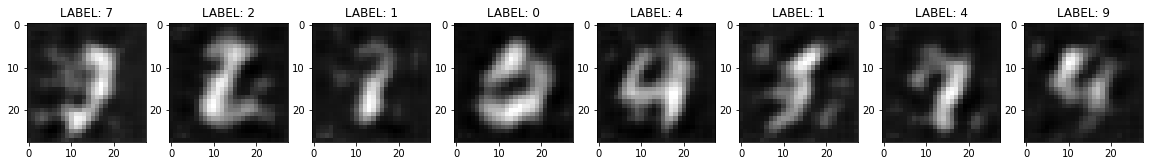

In [ ]:
p_adam_leakyrelu = model_adam_leakyrelu.predict(x_test_noisy)
p_rms_leakyrelu = model_rms_leakyrelu.predict(x_test_noisy)
p_bgd_leakyrelu = model_bgd_leakyrelu.predict(x_test_noisy)

print("Adam-leakyrelu")
plot(p_adam_leakyrelu,y_test)
print("RMS-leakyrelu")
plot(p_rms_leakyrelu,y_test)
print("BGD-leakyrelu")
plot(p_bgd_leakyrelu,y_test)

In [ ]:

print("Adam-Relu Test Results")
model_adam_relu.evaluate(x_test_noisy,x_test)
print()
print("RMS-Relu Test Results")
model_rms_relu.evaluate(x_test_noisy,x_test)
print()
print("BGD-Relu Test Results")
model_bgd_relu.evaluate(x_test_noisy,x_test)
print()

print("Adam-Sig Test Results")
model_adam_sig.evaluate(x_test_noisy,x_test)
print()
print("RMS-Sig Test Results")
model_rms_sig.evaluate(x_test_noisy,x_test)
print()
print("BGD-Sig Test Results")
model_bgd_sig.evaluate(x_test_noisy,x_test)
print()

print("Adam-Tanh Test Results")
model_adam_tanh.evaluate(x_test_noisy,x_test)
print()
print("RMS-Tanh Test Results")
model_rms_tanh.evaluate(x_test_noisy,x_test)
print()
print("BGD-Tanh Test Results")
model_bgd_tanh.evaluate(x_test_noisy,x_test)
print()

print("Adam-LeakyRelu Test Results")
model_adam_leakyrelu.evaluate(x_test_noisy,x_test)
print()
print("RMS-LeakyRelu Test Results")
model_rms_leakyrelu.evaluate(x_test_noisy,x_test)
print()
print("BGD-LeakyRelu Test Results")
model_bgd_leakyrelu.evaluate(x_test_noisy,x_test)
print()

Adam-Relu Test Results
313/313 [==============================] - 1s 3ms/step - loss: 0.0316 - acc: 0.8044

RMS-Relu Test Results
313/313 [==============================] - 1s 3ms/step - loss: 0.0334 - acc: 0.8066

BGD-Relu Test Results
313/313 [==============================] - 2s 4ms/step - loss: 0.0425 - acc: 0.8001

Adam-Sig Test Results
313/313 [==============================] - 1s 4ms/step - loss: 0.0334 - acc: 0.8012

RMS-Sig Test Results
313/313 [==============================] - 1s 4ms/step - loss: 0.0332 - acc: 0.8025

BGD-Sig Test Results
313/313 [==============================] - 1s 4ms/step - loss: 0.0743 - acc: 0.8072

Adam-Tanh Test Results
313/313 [==============================] - 1s 4ms/step - loss: 0.0324 - acc: 0.8036

RMS-Tanh Test Results
313/313 [==============================] - 1s 4ms/step - loss: 0.0341 - acc: 0.8041

BGD-Tanh Test Results
313/313 [==============================] - 1s 4ms/step - loss: 0.0517 - acc: 0.8045

Adam-LeakyRelu Test Results
313/313 [